In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input, Lambda
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.losses import mse, binary_crossentropy
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import pandas as pd

from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Model, load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing.data import StandardScaler

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("datasets/creditcardfraud/creditcard.csv", sep=",", index_col=None)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
284806,1.642058,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0.514355,0


In [4]:
anomalies = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

anomalies.shape, normal.shape


((492, 31), (284315, 31))

In [51]:

for f in range(0, 20):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
data_set = normal[:50000]
# data_set = pd.concat([normal[:50000], anomalies])

x_train, x_test = train_test_split(data_set, test_size = 0.4, random_state = 42)

x_train = x_train.sort_values(by=['Time'])
x_test = x_test.sort_values(by=['Time'])

y_train = x_train["Class"]
y_test = x_test["Class"]

x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)

x_train.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
19,-1.996267,1.492936,-1.029346,0.454795,-1.438026,-1.555434,-0.720961,-1.080664,-0.053127,-1.978682,...,-0.387910,-0.177650,-0.175074,0.040002,0.295814,0.332931,-0.220385,0.022298,0.007602,-0.333239
21,-1.996225,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,-0.269321,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,-0.216935
22,-1.996204,1.166616,0.502120,-0.067300,2.261569,0.428804,0.089474,0.241147,0.138082,-0.989162,...,-0.307169,0.018702,-0.061972,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,-0.344114
28,-1.996099,-0.414289,0.905437,1.727453,1.473471,0.007443,-0.200331,0.740228,-0.029247,-0.593392,...,0.097308,0.077237,0.457331,-0.038500,0.642522,-0.183891,-0.277464,0.182687,0.152665,-0.221293
69,-1.995614,-1.923213,-0.870482,2.320170,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,...,-0.369227,-0.686488,-0.779268,1.086055,0.518863,-0.363712,3.065576,-0.589022,-0.396110,-0.213296
79,-1.995530,-0.671709,0.594503,0.216416,-0.867311,2.966908,3.632495,0.563295,0.673026,-0.188766,...,-0.002784,-0.136441,-0.300362,-0.331692,0.996382,0.502469,-0.518043,-0.208276,-0.116048,-0.294058
85,-1.995425,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.960963,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,0.446428
92,-1.995320,1.107029,0.216441,0.538378,1.476398,-0.251942,-0.340680,0.154092,-0.086503,0.144420,...,-0.111853,-0.060037,0.059884,-0.047526,0.443992,0.640296,-0.337657,0.042108,0.024265,-0.246401
112,-1.995025,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,-0.348512


In [52]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))


Shapes:
x_train:(30000, 30)
y_train:(30000,)

x_test:(20000, 30)
y_test:(20000,)



In [53]:
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1])
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1])
input_shape = (x_train.shape[1])

# y_train = keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)


In [54]:
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))
print("input_shape:{}\n".format(input_shape))

Shapes:
x_train:(30000, 30)
y_train:(30000,)

x_test:(20000, 30)
y_test:(20000,)

input_shape:30



In [55]:
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [56]:
logfilename = "variationalautoencoder"


original_dim  = x_train.shape[1]

print(original_dim)

input_shape = (original_dim,)
intermediate_dim = 20
batch_size = 32
latent_dim = 10
epochs = 200


# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')


# VAE loss = mse_loss or xent_loss + kl_loss
reconstruction_loss = mse(inputs, outputs)

reconstruction_loss *= original_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

30
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
encoder_input (InputLayer)       (None, 30)            0                                            
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 20)            620         encoder_input[0][0]              
____________________________________________________________________________________________________
z_mean (Dense)                   (None, 10)            210         dense_4[0][0]                    
____________________________________________________________________________________________________
z_log_var (Dense)                (None, 10)            210         dense_4[0][0]                    
________________________________________________________________________________________

TypeError: 'numpy.ndarray' object is not callable

In [57]:


vae.compile(optimizer='adam', 
                    loss='mean_squared_error',
                    metrics=['accuracy'])
vae.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 30)                0         
_________________________________________________________________
encoder (Model)              [(None, 10), (None, 10),  1040      
_________________________________________________________________
decoder (Model)              (None, 30)                850       
Total params: 1,890
Trainable params: 1,890
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = vae.fit(x_train, x_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    callbacks=[TensorBoard(log_dir='../logs/{0}'.format(logfilename))])

Train on 30000 samples, validate on 20000 samples
Epoch 1/200
30000/30000 [==============================] - 8s - loss: 0.9669 - acc: 0.3157 - val_loss: 0.8652 - val_acc: 0.4652
Epoch 2/200
30000/30000 [==============================] - 9s - loss: 0.8576 - acc: 0.4978 - val_loss: 0.8310 - val_acc: 0.5198
Epoch 3/200
30000/30000 [==============================] - 8s - loss: 0.8326 - acc: 0.5349 - val_loss: 0.8123 - val_acc: 0.5441
Epoch 4/200
30000/30000 [==============================] - 7s - loss: 0.8175 - acc: 0.5573 - val_loss: 0.7970 - val_acc: 0.5558
Epoch 5/200
30000/30000 [==============================] - 8s - loss: 0.8041 - acc: 0.5718 - val_loss: 0.7878 - val_acc: 0.5696
Epoch 6/200
30000/30000 [==============================] - 8s - loss: 0.7952 - acc: 0.5780 - val_loss: 0.7806 - val_acc: 0.5878
Epoch 7/200
30000/30000 [==============================] - 7s - loss: 0.7894 - acc: 0.5923 - val_loss: 0.7745 - val_acc: 0.6080
Epoch 8/200
30000/30000 [=============================

30000/30000 [==============================] - 8s - loss: 0.7498 - acc: 0.6089 - val_loss: 0.7377 - val_acc: 0.6038
Epoch 65/200
30000/30000 [==============================] - 7s - loss: 0.7494 - acc: 0.6087 - val_loss: 0.7380 - val_acc: 0.6006
Epoch 66/200
30000/30000 [==============================] - 8s - loss: 0.7494 - acc: 0.6097 - val_loss: 0.7380 - val_acc: 0.6171
Epoch 67/200
30000/30000 [==============================] - 8s - loss: 0.7494 - acc: 0.6122 - val_loss: 0.7380 - val_acc: 0.6031
Epoch 68/200
30000/30000 [==============================] - 7s - loss: 0.7493 - acc: 0.6165 - val_loss: 0.7376 - val_acc: 0.6087
Epoch 69/200
30000/30000 [==============================] - 7s - loss: 0.7490 - acc: 0.6133 - val_loss: 0.7376 - val_acc: 0.6039
Epoch 70/200
30000/30000 [==============================] - 8s - loss: 0.7490 - acc: 0.6201 - val_loss: 0.7373 - val_acc: 0.6280
Epoch 71/200
30000/30000 [==============================] - 7s - loss: 0.7489 - acc: 0.6186 - val_loss: 0.7372

30000/30000 [==============================] - 8s - loss: 0.7364 - acc: 0.6221 - val_loss: 0.7240 - val_acc: 0.6196
Epoch 128/200
30000/30000 [==============================] - 8s - loss: 0.7360 - acc: 0.6219 - val_loss: 0.7241 - val_acc: 0.6259
Epoch 129/200
30000/30000 [==============================] - 7s - loss: 0.7360 - acc: 0.6251 - val_loss: 0.7243 - val_acc: 0.6288
Epoch 130/200
30000/30000 [==============================] - 8s - loss: 0.7360 - acc: 0.6230 - val_loss: 0.7239 - val_acc: 0.6289
Epoch 131/200
30000/30000 [==============================] - 8s - loss: 0.7359 - acc: 0.6233 - val_loss: 0.7240 - val_acc: 0.6231
Epoch 132/200
30000/30000 [==============================] - 8s - loss: 0.7361 - acc: 0.6222 - val_loss: 0.7242 - val_acc: 0.6291
Epoch 133/200
30000/30000 [==============================] - 8s - loss: 0.7360 - acc: 0.6262 - val_loss: 0.7240 - val_acc: 0.6245
Epoch 134/200
30000/30000 [==============================] - 7s - loss: 0.7359 - acc: 0.6232 - val_loss:

30000/30000 [==============================] - 8s - loss: 0.7349 - acc: 0.6232 - val_loss: 0.7232 - val_acc: 0.6019
Epoch 191/200
30000/30000 [==============================] - 7s - loss: 0.7350 - acc: 0.6245 - val_loss: 0.7228 - val_acc: 0.6351
Epoch 192/200
30000/30000 [==============================] - 7s - loss: 0.7350 - acc: 0.6260 - val_loss: 0.7230 - val_acc: 0.6187
Epoch 193/200
30000/30000 [==============================] - 7s - loss: 0.7350 - acc: 0.6268 - val_loss: 0.7230 - val_acc: 0.6274
Epoch 194/200
30000/30000 [==============================] - 7s - loss: 0.7349 - acc: 0.6257 - val_loss: 0.7227 - val_acc: 0.6308
Epoch 195/200
30000/30000 [==============================] - 7s - loss: 0.7349 - acc: 0.6273 - val_loss: 0.7232 - val_acc: 0.6148
Epoch 196/200
30000/30000 [==============================] - 7s - loss: 0.7349 - acc: 0.6239 - val_loss: 0.7237 - val_acc: 0.6223
Epoch 197/200
30000/30000 [==============================] - 8s - loss: 0.7349 - acc: 0.6223 - val_loss:

In [13]:
# y_test

In [68]:
predictions = vae.predict(x_test)

mse = np.mean(np.power(x_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,20000.000000,20000.0
mean,0.723399,0.0
std,3.173364,0.0
min,0.030845,0.0
25%,0.229293,0.0
50%,0.394443,0.0
75%,0.631904,0.0
max,220.212226,0.0


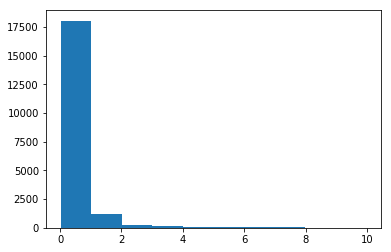

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [70]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


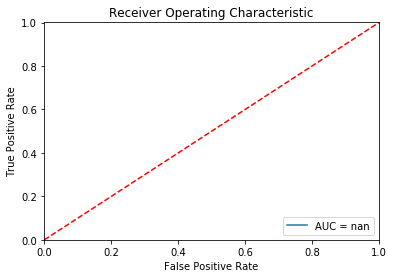

In [71]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [72]:
error_df.quantile(0.25)

reconstruction_error    0.229293
true_class              0.000000
Name: 0.25, dtype: float64

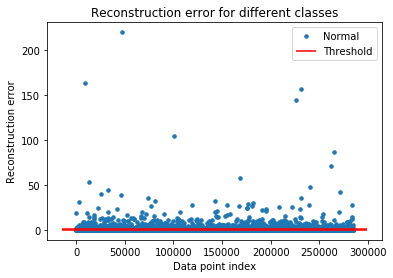

In [73]:
threshold = 1.5 * (error_df.quantile(0.75) - error_df.quantile(0.25))
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

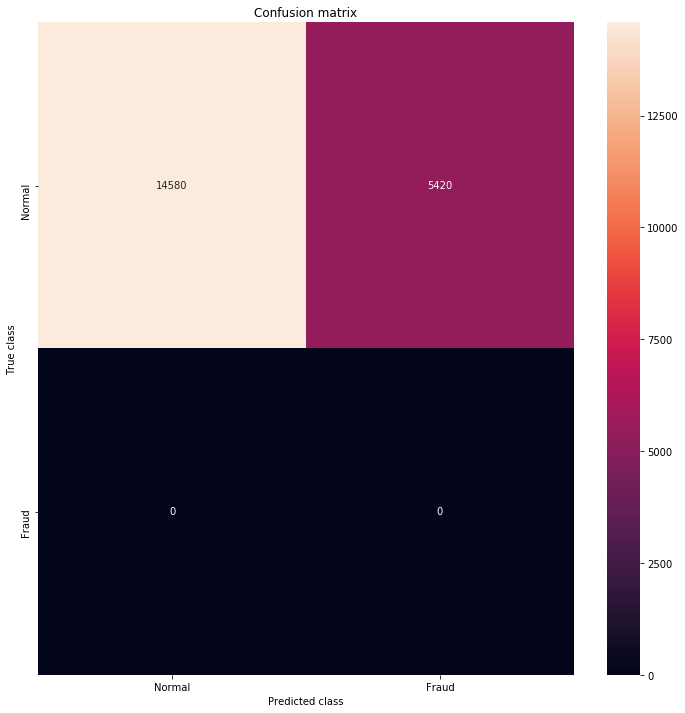

In [74]:
import seaborn as sns

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [75]:
counter = []

for f in range(0, len(error_df)):
    if error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [76]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, y_test)
print("AUC: {:.2%}".format (auc))

AUC: 50.00%


In [77]:
anom_class = anomalies['Class']
anom = anomalies.drop('Class', axis=1)

anom.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-1.988034,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229
623,-1.986644,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758
4920,-1.902623,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031
6108,-1.849472,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342
6329,-1.838248,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231


In [78]:
anom = np.array(anom)

In [79]:

anom_predictions = vae.predict(anom)

anom_mse = np.mean(np.power(anom - anom_predictions, 2), axis=1)
anom_error_df = pd.DataFrame({'reconstruction_error': anom_mse,
                        'true_class': anom_class})

anom_error_df.describe()

,reconstruction_error,true_class
count,492.000000,492.0
mean,26.042969,1.0
std,36.471649,0.0
min,0.112861,1.0
25%,4.083078,1.0
50%,10.017764,1.0
75%,25.242111,1.0
max,268.142089,1.0


In [80]:
threshold.reconstruction_error

0.6039163500177541

In [83]:
# print(np.array(anom_error_df.values[2][0]))

# for f in range(0, len(anom_error_df)):
#     print(np.array(anom_error_df.values[f][0]) > threshold)

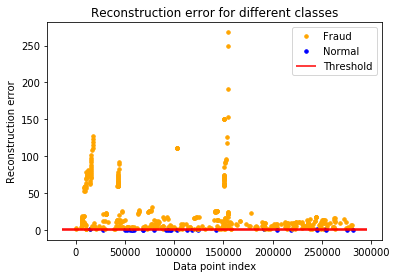

In [84]:
# threshold = threshold.reconstruction_error
groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()


for f in range(0, len(anom_error_df)):
    ax.plot(anom_error_df.index[f], anom_error_df.reconstruction_error.values[f], marker='o', ms=3.5, linestyle='',
           label="Fraud" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "Normal",
           color="orange" if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error else "b")
    

    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)


plt.show();

In [85]:
counter = 0

for f in range(0, len(anom_error_df)):
    if anom_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter = counter + 1
    
    
print("Accuracy: {}".format(counter / len(anom_error_df)))

Accuracy: 0.9410569105691057


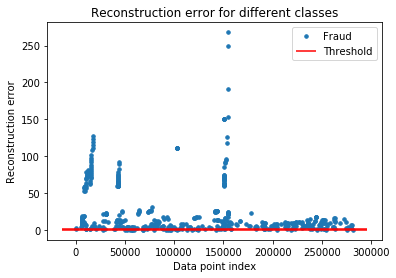

In [86]:

groups = anom_error_df.groupby('true_class')
fig, ax = plt.subplots()



for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if ((group.reconstruction_error.values[name] > threshold.reconstruction_error)) else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [87]:
#### EVALUATION ON THE ENTIRE DF

In [88]:
points = np.array(df.drop('Class', axis=1))
truths = df['Class']

In [89]:
preds = vae.predict(points)

pred_mse = np.mean(np.power(points - preds, 2), axis=1)
pred_error_df = pd.DataFrame({'reconstruction_error': pred_mse,
                        'true_class': truths})

pred_error_df.describe()

,reconstruction_error,true_class
count,284807.000000,284807.000000
mean,0.799555,0.001727
std,5.184158,0.041527
min,0.030845,0.000000
25%,0.230176,0.000000
50%,0.396524,0.000000
75%,0.640139,0.000000
max,1801.725568,1.000000


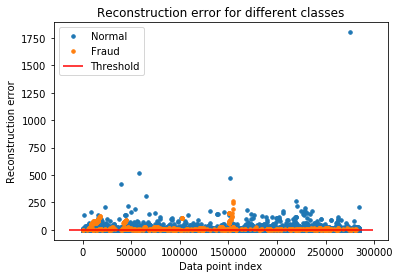

In [90]:
threshold = 1.5 * (pred_error_df.quantile(0.75) - pred_error_df.quantile(0.25))
groups = pred_error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold.reconstruction_error, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

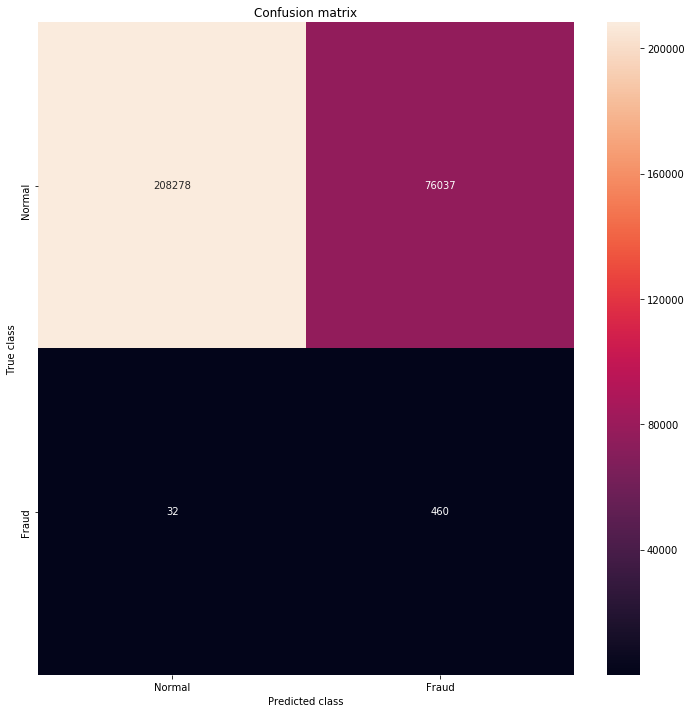

In [91]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold.reconstruction_error else 0 for e in pred_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(pred_error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [92]:
counter = []

for f in range(0, len(pred_error_df)):
    if pred_error_df.reconstruction_error.values[f] > threshold.reconstruction_error:
        counter.append(1)
    else:
        counter.append(0)

In [93]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score( counter, truths)
print("AUC: {:.2%}".format (auc))

AUC: 50.29%
